In [25]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time
# 

In [26]:
#设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [27]:
#加载数据
path='./household_power_consumption_200.txt'
path='./household_power_consumption_1000.txt'
df=pd.read_csv(path,sep=';',low_memory=False)

#日期，时间，有功功率，无功功率，电压，电流等
names2=df.columns
names=['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

#异常数据处理
new_df=df.replace('?',np.nan)
datas=new_df.dropna(axis=0,how='any') #只要数据为空，就进行删除操作
datas

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


R2 0.48506578175142084


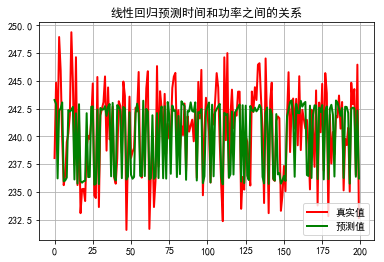

In [28]:
#创建一个时间字符串格式化字符串
#创建一个时间函数格式化字符串
def date_format(dt):
    #dt显示是一个series/tuple  dt[0]是date  dt[1]是time
    t=time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

#时间和电压之间的关系
#获取x和y变量，并将时间转换为数值型连续变量
X=datas[names[0:2]]
# print(X)

X=X.apply(lambda x:pd.Series(date_format(x)),axis=1)
Y=datas[names[4]].values
X=X.astype(np.float)
Y=Y.astype(np.float)

#对数据集进行测试集和训练集的划分
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

#模型训练
lr=LinearRegression()
lr.fit(X_train,Y_train)  ##训练模型

#模型校验
y_predict=lr.predict(X_test)  #预测结果

#模型效果
print("R2",lr.score(X_test,Y_test))

#预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t,Y_test,'r-',linewidth=2,label=u'真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label=u'预测值')
plt.legend(loc='lower right')
plt.title(u'线性回归预测时间和功率之间的关系')
plt.grid(b=True)
plt.show()








E:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1阶，系数为： [ 2.39926650e+02  0.00000000e+00 -1.11022302e-16  3.97781449e+00
  8.73334650e-01  1.70647992e-01  0.00000000e+00]
2阶，系数为： [ 1.23998300e+02  2.13162821e-14 -7.10542736e-15  5.34497071e+01
  2.95068077e+00  2.69407641e-01 -8.88178420e-15  7.10542736e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.02461452e+02 -2.50100464e+01
 -5.18469319e-01  0.00000000e+00 -1.02427364e+01 -4.65982219e-01
  0.00000000e+00 -3.55472266e-02  0.00000000e+00  0.00000000e+00]
3阶，系数为： [ 1.28562659e+02 -7.10542736e-14 -9.23705556e-14  4.16748398e+01
 -1.07946808e+01 -3.66184727e-02  1.77635684e-14  1.59872116e-14
  1.21680443e-13  7.10542736e-15  1.77635684e-14  7.90478794e-14
  2.30926389e-14 -4.26325641e-14 -1.06581410e-14 -2.84217094e-14
  0.00000000e+00  0.00000000e+00  1.11770337e+02  1.78160161e+00
  5.92635101e-01  0.00000000e+00  1.09819500e+00  3.41115652e-01
  0.00000000e+0

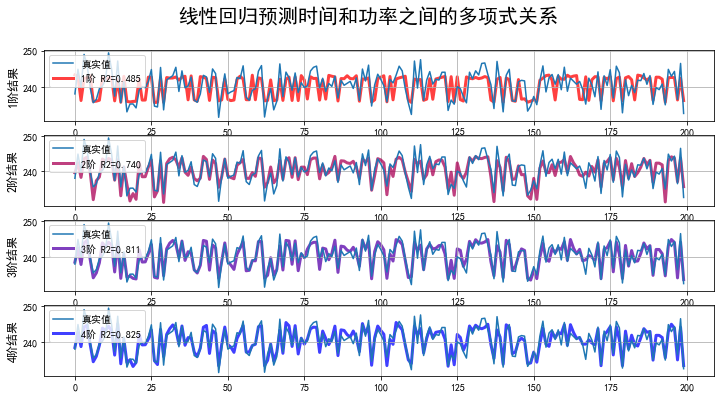

In [33]:
#时间与电压之间的关系（Linear-多项式）
#pipeline 管道的意思，将多个操作合并成一个操作
#pipeline总可以给定多个不同的操作，给定每个不同操作名称即可，执行的时候
#按照从前到后
#pipeline对象在执行的过程中，当调用某个方法的时候，会调用对应过程的对应对象的对应方法
#eg.在下面的案例中调用了fit方法
#那么对数据调用第一步操作：PolynomialFeatures的fit_transform方法对数据进行转换
#并构建模型，然后对转换之后的数据调用第二步操作，LinearRegression的fit方法构建模型
#eg 在下面这个案例中，调用了predict方法
#那么对数据调用第一步操作：PolynomialFeatures的transform方法对数据进行转换
#然后对转换之后的数据调用第二步操作 LinearRegression的predict方法进行预测
model=Pipeline([('Poly',PolynomialFeatures()), #多项式扩展
                ('Linear',LinearRegression(fit_intercept=False))
               ])
#获取x和y变量，并将时间转换成数值连续变量
X=datas[names[0:2]]
X=X.apply(lambda x:pd.Series(date_format(x)),axis=1)
Y=datas[names[4]]

#对数据集进行测试集 训练集的划分
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#数据标准化
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #训练并转换
X_test=ss.transform(X_test) #直接使用在模型构建数据上进行一个数据标准化操作

#模型训练
t=np.arange(len(X_test))
N=5
d_pool=np.arange(1,N,1) 
m=d_pool.size
clrs=[] #颜色
for c in np.linspace(16711680,255,m):
    clrs.append('#%06x'%int(c))
line_width=3

plt.figure(figsize=(12,6),facecolor='w') #创建一个绘图窗口，设置大小，设置颜色
for i,d in enumerate(d_pool):
    #创建几个图（几行几列）
    plt.subplot(N-1,1,i+1)
    plt.plot(t,Y_test,'-',label=u'真实值',ms=10,zorder=N)
    ##设置管道对象中的参数值，Poly是在管道对象中定义的操作名称，后面跟参数名称，中间两下划线
    model.set_params(Poly__degree=d) #设置多项式阶乘
    model.fit(X_train,Y_train) #模型训练
    # Linear是管道中定义的操作名称
    # 获取线性回归算法模型对象
    lin=model.get_params()['Linear']
    output=u'%d阶，系数为：' % d
    print(output,lin.coef_.ravel())

    #模型结果预测
    y_hat=model.predict(X_test)
    #计算评估值
    s=model.score(X_test,Y_test)

    #画图
    z=N-1 if (d==2) else 0
    label=u'%d阶 R2=%.3f'% (d,s)
    plt.plot(t,y_hat,color=clrs[i],lw=line_width,alpha=0.75,label=label,zorder=z)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果'%d,fontsize=12)

## 预测值和实际值画图比较
plt.suptitle(u'线性回归预测时间和功率之间的多项式关系',fontsize=20)
plt.grid(b=True)
plt.show()
